# Logistic Regression(Classification) Project
# Titanc Dataset

- Import Packages

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

- Import and Inspect Data

In [116]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Data Cleaning

In [85]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

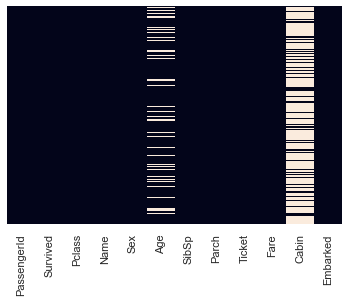

In [13]:
sns.heatmap(df.isna(),cbar=False,yticklabels=False)

In [117]:
# Dealing with Missing Values
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean,inplace=True)

df.drop(columns=['Cabin'], inplace=True)

df['Embarked'].fillna(method='backfill',inplace=True)

<AxesSubplot: >

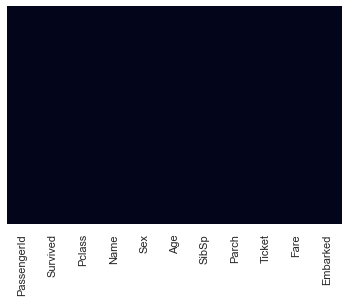

In [118]:
sns.heatmap(df.isna(),cbar=False,yticklabels=False)

- Exploratory Data Analysis

In [84]:
df[{'Age','Fare'}].describe().round(1)

,Age,Fare
count,714.0,891.0
mean,29.7,32.2
std,14.5,49.7
min,0.4,0.0
25%,20.1,7.9
50%,28.0,14.5
75%,38.0,31.0
max,80.0,512.3


In [15]:
sns.set_style('whitegrid')

<AxesSubplot: xlabel='Survived', ylabel='count'>

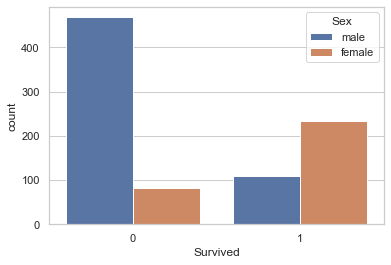

In [18]:
sns.countplot(data=df,x='Survived',hue='Sex')

<AxesSubplot: xlabel='Survived', ylabel='count'>

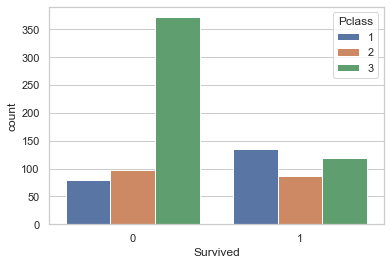

In [19]:
sns.countplot(data=df,x='Survived',hue='Pclass')

<AxesSubplot: xlabel='Age'>

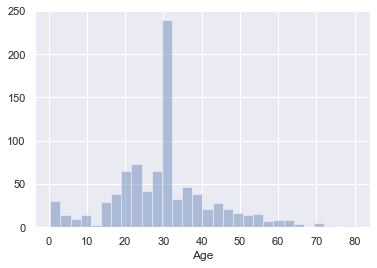

In [119]:
sns.distplot(df['Age'],bins=30,kde=False)

In [42]:
df['Fare'].iplot(kind='hist',bins=30)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

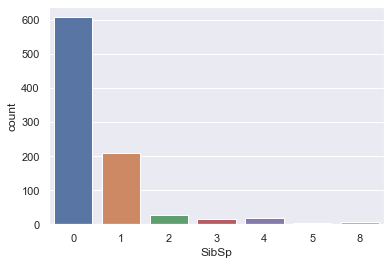

In [32]:
sns.countplot(data=df,x='SibSp')

In [50]:
px.bar(data_frame=df,x='Sex',y='Age')

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [120]:
px.pie(data_frame=df,names='Embarked',values='Fare')

In [58]:
px.box(data_frame=df,x='Fare')

In [59]:
px.box(data_frame=df,x='Age')

<AxesSubplot: >

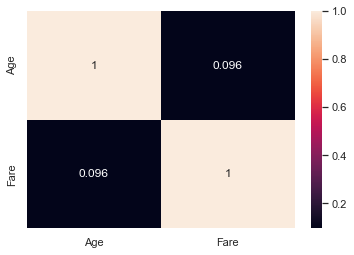

In [64]:
corr = df[{'Fare','Age'}].corr()
sns.heatmap(corr,annot=True)

ML Model Phase

- Data Preprocessing for ML Model

In [122]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [121]:
embark = pd.get_dummies(df['Embarked'])

In [123]:
df = pd.concat([embark,sex,df],axis=1)

In [126]:
df.drop(['Sex', 'Embarked','Ticket','Name'],axis=1,inplace=True)

In [128]:
df.drop('PassengerId',axis=1,inplace=True)

In [129]:
df.head()

,C,Q,S,male,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,0,1,1,0,3,22.0,1,0,7.2500
1,1,0,0,0,1,1,38.0,1,0,71.2833
2,0,0,1,0,1,3,26.0,0,0,7.9250
3,0,0,1,0,1,1,35.0,1,0,53.1000
4,0,0,1,1,0,3,35.0,0,0,8.0500


- Build, Fit, Predict and Evalute the Model

In [130]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [135]:
logmod = LogisticRegression()

In [136]:
logmod.fit(X_train, y_train)

LogisticRegression()

In [138]:
predictions = logmod.predict(X_test)

In [141]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       154
           1       0.78      0.66      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



In [143]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 39,  75]], dtype=int64)